## Neural Nets Implementation & XOR Problem

**Goal:** The goal of this exercise is to implement a small neural network from scratch and train it using backprop.

In [110]:
import numpy as np
import pickle
import matplotlib.pyplot as plt 

In [112]:
# Load xor toy dataset
with open('xordata.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train'] # 800 training data points with 2 features
y_train = data['y_train'] # training binary labels {0,1}

X_test = data['X_test']
y_test = data['y_test']

In [114]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


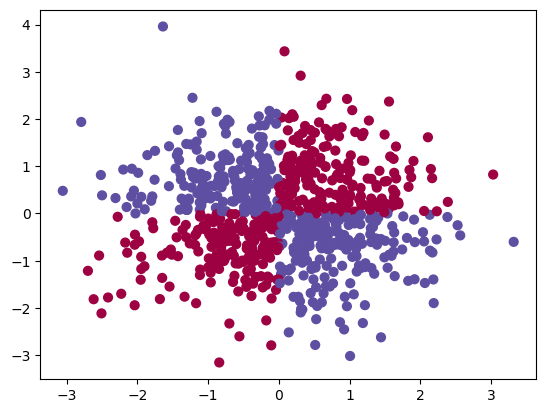

In [116]:
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)

**In this exercise, do the following:**
1. Implement brackprop to train a two-layer perceptron: an input layer, a hidden layer, and an output layer.
2. The core of the code should include: a forward pass, a backward pass, and weight updates.
3. For input and output layers specify the number of nodes appropriate for the above problem.
4. Randomly initialize the weights and biases of the network.
5. For the hidden layer use ReLU as an activation function and for the output layer use logistic sigmoid.
6. Use cross-entropy loss as the network's loss function and mini-batch SGD as the optimizer.
7. Use cross-validation to estimate performance.
8. Tune the network as you see fit (including number of units in the hidden layer, learning rate,  batch size, number of epochs, etc).
9. Provide a classification report of the performance on the train and test set.
10. Write a summary. Make sure you document your code well.
  
(Optional) You can use sklearn.inspection.DecisionBoundaryDisplay to visualize your decision boundary.

In [137]:
# Ensure that labels are reshaped to have the correct dimensions
y_train = y_train.reshape(-1, 1)  # Convert (800,) to (800, 1)
y_test = y_test.reshape(-1, 1)    # Convert (200,) to (200, 1)

In [139]:
def initialize_parameters(input_dim, hidden_dim, output_dim):
    np.random.seed(42)
    W1 = np.random.randn(input_dim, hidden_dim) * 0.01
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) * 0.01
    b2 = np.zeros((1, output_dim))
    return W1, b1, W2, b2

In [141]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    return A * (1 - A)

In [143]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    return A2, cache

In [145]:
def backward_propagation(X, Y, cache):
    Z1, A1, W1, b1, Z2, A2, W2, b2 = cache
    m = X.shape[0]

    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients

In [147]:
def update_parameters(W1, b1, W2, b2, gradients, learning_rate):
    W1 -= learning_rate * gradients["dW1"]
    b1 -= learning_rate * gradients["db1"]
    W2 -= learning_rate * gradients["dW2"]
    b2 -= learning_rate * gradients["db2"]
    return W1, b1, W2, b2

In [149]:
def compute_loss(Y, A2):
    m = Y.shape[0]
    loss = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    return np.squeeze(loss)

In [151]:
def train_neural_network(X, Y, hidden_dim, epochs, learning_rate, batch_size):
    input_dim = X.shape[1]
    output_dim = 1
    W1, b1, W2, b2 = initialize_parameters(input_dim, hidden_dim, output_dim)
    losses = []

    for epoch in range(epochs):
        # Mini-batch gradient descent
        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i+batch_size]
            Y_batch = Y[i:i+batch_size]

            A2, cache = forward_propagation(X_batch, W1, b1, W2, b2)
            gradients = backward_propagation(X_batch, Y_batch, cache)
            W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, gradients, learning_rate)

        # Compute loss for the entire dataset
        A2, _ = forward_propagation(X, W1, b1, W2, b2)
        loss = compute_loss(Y, A2)
        losses.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return W1, b1, W2, b2, losses

In [153]:
W1, b1, W2, b2, losses = train_neural_network(X_train, y_train, hidden_dim=4, epochs=1000, learning_rate=0.01, batch_size=32)

Epoch 0, Loss: 0.6929
Epoch 100, Loss: 0.6892
Epoch 200, Loss: 0.6859
Epoch 300, Loss: 0.6598
Epoch 400, Loss: 0.6072
Epoch 500, Loss: 0.5575
Epoch 600, Loss: 0.5261
Epoch 700, Loss: 0.5066
Epoch 800, Loss: 0.4941
Epoch 900, Loss: 0.4849


In [155]:
def predict(X, W1, b1, W2, b2):
    A2, _ = forward_propagation(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)

# Predictions
y_train_pred = predict(X_train, W1, b1, W2, b2)
y_test_pred = predict(X_test, W1, b1, W2, b2)

# Classification Report
from sklearn.metrics import classification_report
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.43      0.59       234
           1       0.67      0.97      0.79       278

    accuracy                           0.72       512
   macro avg       0.80      0.70      0.69       512
weighted avg       0.79      0.72      0.70       512

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.47      0.63        97
           1       0.66      0.98      0.79       103

    accuracy                           0.73       200
   macro avg       0.81      0.73      0.71       200
weighted avg       0.81      0.73      0.72       200



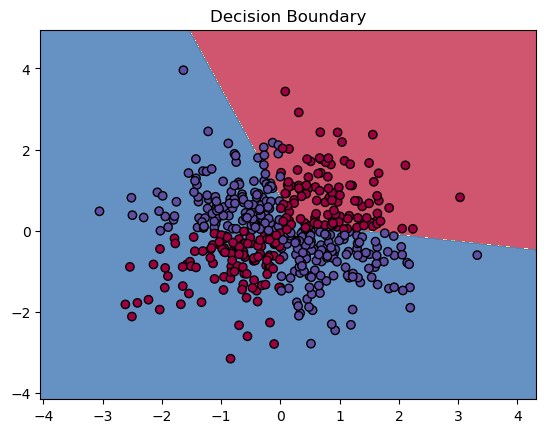

In [157]:
def plot_decision_boundary(X, Y, W1, b1, W2, b2):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], W1, b1, W2, b2)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), edgecolor='k', cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_train, y_train, W1, b1, W2, b2)